# OK CUPID Dataset

## Power BI - "Love Analytics: Unveiling Insights in the World of Online Dating"	

### Problem statement

Humans are usually classified as a 'Social Animal'.<br>
This emphasizes our natural inclination and ability to form social connections, interact with others, and engage in cooperative behaviors. <br>
One such meaninful social connection or relation is - Love, something everyone is looking for. In this day and age where everyone is busy is their own rat race, it can often get very challenging to find such a connection.<br>
But, as humans we don't like to give up on any prospect, so we came up with - Online Dating Platforms. <br>

In the digital age, online dating platforms have become increasingly popular avenues for individuals to seek companionship and romantic connections. However, with the vast amount of data generated by these platforms, there exists a tremendous opportunity to gain valuable insights into user behaviors, preferences, and trends. <br>

The objective of this project, "Love Analytics: Unveiling Insights in the World of Online Dating," is to leverage the power of data analytics using Power BI to uncover actionable insights that can enhance user experiences, optimize matchmaking algorithms, and improve overall platform performance.

### Data

The data has been procured from - Kaggle

##### Libraries

In [3]:
# Import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Basic EDA

##### Data

In [2]:
# Loading the data

data = pd.read_csv(r"okcupid_profiles.csv")

In [3]:
# Calling the data

data

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,...,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59942,24,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,"white, other",...,i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.
59943,42,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,asian,...,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively - getting thin...,i'm quiet until i get used to the environment ...,"last book: ""game change"". movies

In [130]:
data.age.max()

69

In [5]:
data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [6]:
# General description of the data

print('Data shape -', data.shape)
print()
print('Data types','\n', data.dtypes)
print()
print('Description','\n')
print(data.describe(include='all'))
print()
print('Data Info', data.info())

Data shape - (59946, 31)

Data types 
 age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
dtype: object

Description 

                 age  status    sex orientation body_type             diet  \
count   59946.000000   59946  59946       59946     54650            35551   
unique           NaN       5      2           3        12      

Insights:
* The data consists of 59946 rows and 31 columns.
* Most of the data is categoric in nature.
* The average Age of the people on this app are around 32 years, with 18 being the minimum and 110 being maximum.
* There are 5 kinds of relationship Status out of which most of the them are 'Single'.
* The maximum number of people on the application are 'Males'
* The maximum number of people have their orientation as 'Straight'.
* The maximum number of people have an 'Average' body type.
* Most of the people are not very picky with their diet, they preffer 'mostly anything'.
* Most of the people drink socially
* Large number of people do not induldge in drugs or substance
* Large number of people have completed their graduation from college or university
* Most of the people on the application are white in ethnicity 

## Pre-processing the data

##### Handling missing values

In [7]:
# Checking for missing values in the data

data.isnull().sum().sort_values(ascending=False)

offspring      35561
diet           24395
religion       20226
pets           19921
essay8         19225
drugs          14080
essay6         13771
essay9         12603
essay7         12451
essay3         11476
sign           11056
essay5         10850
essay4         10537
essay2          9638
job             8198
essay1          7572
education       6628
ethnicity       5680
smokes          5512
essay0          5488
body_type       5296
drinks          2985
speaks            50
height             3
orientation        0
status             0
sex                0
income             0
last_online        0
location           0
age                0
dtype: int64

There is quite a lot of values missing from some of the attributes

In [8]:
x=data.isnull().sum()/len(data)*100
x.sort_values(ascending=False)

offspring      59.321723
diet           40.694959
religion       33.740366
pets           33.231575
essay8         32.070530
drugs          23.487806
essay6         22.972342
essay9         21.023922
essay7         20.770360
essay3         19.143896
sign           18.443266
essay5         18.099623
essay4         17.577486
essay2         16.077803
job            13.675641
essay1         12.631368
education      11.056618
ethnicity       9.475194
smokes          9.194942
essay0          9.154906
body_type       8.834618
drinks          4.979482
speaks          0.083408
height          0.005005
orientation     0.000000
status          0.000000
sex             0.000000
income          0.000000
last_online     0.000000
location        0.000000
age             0.000000
dtype: float64

On the bases of the percentage of the missing data we will treat them

##### Visualizing the missing values

Text(0.5, 1.0, 'Missing data')

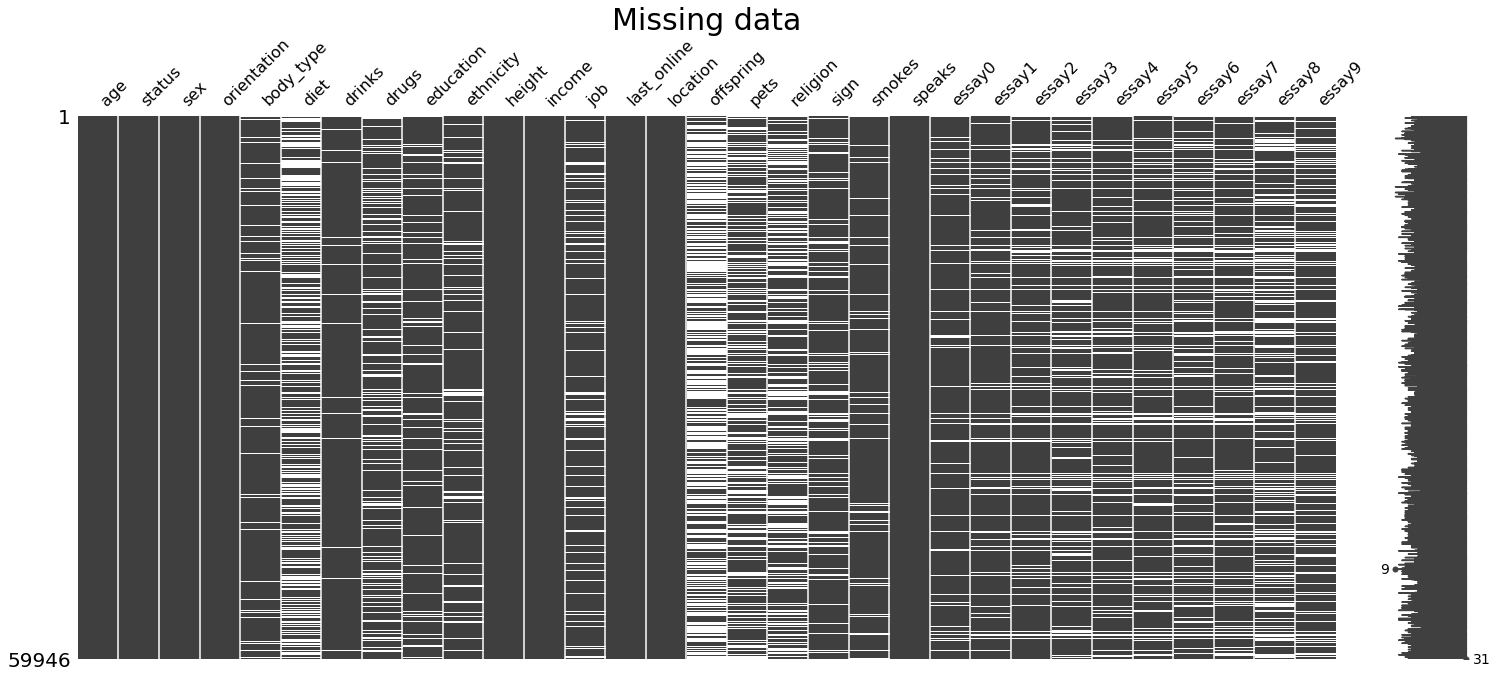

In [9]:
import missingno as msno
missing = msno.matrix(data)

missing.set_title('Missing data', fontsize = 30)

*Dropping the columns if the missing values are more than 50% to avoid biasness in the data*

#### Column - 'Offspring'

The column 'Offspring' has missing data around 50%

In [10]:
# Dropping the column 'Offspring'

data.drop(['offspring'], axis = 1, inplace = True)

In [11]:
# Checking if the columns has been dropped

data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'pets', 'religion', 'sign', 'smokes',
       'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5',
       'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

The column 'offspring' has been successfully dropped

*Filling the if the missing values are less than 50% to avoid data loss*

#### Column - 'Diet'

The column 'diet' has 40% of missing data

In [12]:
data.diet.value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

Since there is a value for 'other', we will be filling the missing data with 'other'

In [13]:
# Filling the missing values with 'other'

data['diet'].fillna(value='other', inplace=True)

In [14]:
# Checking if the missing values have been treated

data.diet.isnull().sum()

0

The missing values for the column 'diet' have been dealt with

#### Column - 'Religion'

The column 'Religion' has 33% of missing data

In [15]:
data.religion.value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

Since there is a value for 'other', we will be filling the missing data with 'other'

In [16]:
# Filling the missing values with 'other'

data['religion'].fillna(value='other', inplace=True)

In [17]:
# Checking if the missing values have been treated

data.religion.isnull().sum()

0

The missing values for the column 'religion' have been dealt with

#### Column - 'Pets'

The column 'Pets' has 33% of missing data

In [18]:
data.pets.value_counts()

likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

Filling the missing values with 'No preference'

In [19]:
# Filling the missing values with 'No preference'

data['pets'].fillna(value='No preference', inplace=True)

In [20]:
# Checking if the missing values have been treated

data.pets.isnull().sum()

0

The missing values for the column 'pets' have been dealt with

#### Column - 'Drugs'

The column 'Drugs' has 23% of missing data

In [21]:
data.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

Filling the missing values with 'None'

In [22]:
# Filling the missing values with 'No preference'

data['drugs'].fillna(value='None', inplace=True)

In [23]:
# Checking if the missing values have been treated

data.drugs.isnull().sum()

0

The missing values for the column 'drugs' have been dealt with

#### Column - 'Sign'

The column 'Sign' has 18% of missing data

In [24]:
data.sign.value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

Filling the missing values with 'Do not believe'

In [25]:
# Filling the missing values with 'Do not believe'

data['sign'].fillna(value='No Do not believe', inplace=True)

In [26]:
# Checking if the missing values have been treated

data.sign.isnull().sum()

0

The missing values for the column 'sign' have been dealt with

*Dropping the missing values if the missing data is less than 15%*

#### Column - 'Job'

The column 'Job' has 13% of missing data

In [27]:
data.job.value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

Since there is 'rather not say'<br>
Filling the missing values with 'rather not say'

In [28]:
# Filling the missing values with 'rather not say'

data['job'].fillna(value='rather not say', inplace=True)

In [29]:
# Checking if the missing values have been treated

data.job.isnull().sum()

0

The missing values for the column 'job' have been dealt with

#### Column - 'Education'

The column 'Education' has 11% of missing data

In [30]:
data.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

Dropping the missing values

In [31]:
# Filling the missing values with 'rather not say'

data.dropna(subset=['education'], inplace=True)

In [32]:
# Checking if the missing values have been dropped

data.education.isnull().sum()

0

The missing values for the column 'education' have been dropped

#### Column - 'Ethnicity'

The column 'Ethnicity' has 9% of missing data

In [33]:
data.ethnicity.value_counts()

white                                                                       29786
asian                                                                        5559
hispanic / latin                                                             2343
black                                                                        1762
other                                                                        1500
                                                                            ...  
asian, native american, pacific islander, hispanic / latin, white, other        1
asian, middle eastern, hispanic / latin                                         1
black, indian, hispanic / latin, white                                          1
asian, black, hispanic / latin, white                                           1
middle eastern, black, native american, white, other                            1
Name: ethnicity, Length: 206, dtype: int64

Dropping the missing values

In [34]:
# Drpooing the missing values 

data.dropna(subset=['ethnicity'], inplace=True)

In [35]:
# Checking if the missing values have been treated

data.ethnicity.isnull().sum()

0

The missing values for the column 'job' have been dropped

#### Column - 'Smokes'

The column 'Smokes' has 9% of missing data

In [36]:
data.smokes.value_counts()

no                37137
sometimes          2991
when drinking      2536
yes                1658
trying to quit     1160
Name: smokes, dtype: int64

Dropping the missing values

In [37]:
# Dropping the missing values 

data.dropna(subset=['smokes'], inplace=True)

In [38]:
# Checking if the missing values have been treated

data.smokes.isnull().sum()

0

The missing values for the column 'smokes' have been dropped

#### Column - 'Body type'

The column 'body_type' has 8% of missing data

In [39]:
data.body_type.value_counts()

average           11383
fit                9887
athletic           9087
thin               3663
curvy              3053
a little extra     2120
skinny             1336
full figured        833
overweight          362
jacked              292
used up             242
rather not say      140
Name: body_type, dtype: int64

Dropping the missing value

In [40]:
# Filling the missing values with 'rather not say'

data.dropna(subset=['body_type'], inplace=True)

In [41]:
# Checking if the missing values have been treated

data.body_type.isnull().sum()

0

The missing values for the column 'body_type' have been dropped

#### Column - 'Drinks'

The column 'Drinks' has 4% of missing data

In [42]:
data.drinks.value_counts()

socially       30651
rarely          4563
often           3643
not at all      2458
very often       325
desperately      209
Name: drinks, dtype: int64

Dropping the missing values

In [43]:
# Dropping the missing values 

data.dropna(subset=['drinks'], inplace=True)

In [44]:
# Checking if the missing values have been treated

data.drinks.isnull().sum()

0

The missing values for the column 'drinks' have been dropped

#### Column - 'Speaks'

The column 'speaks' has 50 missing values

In [45]:
data.speaks.value_counts()

english                                                                                            13385
english (fluently)                                                                                  5120
english (fluently), spanish (poorly)                                                                1621
english (fluently), spanish (okay)                                                                  1496
english (fluently), spanish (fluently)                                                               945
                                                                                                   ...  
english (fluently), indonesian (fluently), chinese (poorly), turkish (poorly), french (poorly)         1
english (fluently), portuguese (fluently), hebrew (fluently), spanish (fluently), french (okay)        1
english (fluently), french (fluently), norwegian (poorly)                                              1
english (okay), russian (poorly)                       

Dropping the missing values

In [46]:
# Dropping the missing values 

data.dropna(subset=['speaks'], inplace=True)

In [47]:
# Checking if the missing values have been treated

data.speaks.isnull().sum()

0

The missing values for the column 'speaks' have been dropped

#### Column - 'Height'

The column 'Height' has 3 missing values

In [48]:
data.height.value_counts()

70.0    4302
68.0    3805
67.0    3736
72.0    3695
69.0    3614
66.0    3397
71.0    3382
64.0    2679
65.0    2647
73.0    1996
63.0    1872
74.0    1798
62.0    1548
75.0     968
61.0     703
76.0     565
60.0     502
77.0     190
59.0     153
78.0      90
79.0      38
58.0      35
80.0      20
57.0      11
95.0      10
82.0       9
83.0       8
81.0       7
56.0       6
55.0       5
53.0       4
36.0       3
94.0       3
91.0       2
54.0       2
43.0       2
85.0       1
48.0       1
86.0       1
93.0       1
47.0       1
49.0       1
9.0        1
92.0       1
87.0       1
37.0       1
88.0       1
3.0        1
Name: height, dtype: int64

Dropping the missing values

In [49]:
# Checking if the missing values have been treated

data.height.isnull().sum()

0

The missing values for the column 'height' have been dropped

Checking if all the missing values have been dealt with

In [50]:
data.drinks.isnull().sum()

0

In [51]:
data.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type          0
diet               0
drinks             0
drugs              0
education          0
ethnicity          0
height             0
income             0
job                0
last_online        0
location           0
pets               0
religion           0
sign               0
smokes             0
speaks             0
essay0          3224
essay1          4350
essay2          5709
essay3          6777
essay4          6148
essay5          6327
essay6          8391
essay7          7339
essay8         12061
essay9          7723
dtype: int64

Checking the status of the missing data using visualizaions

Text(0.5, 1.0, 'Missing data')

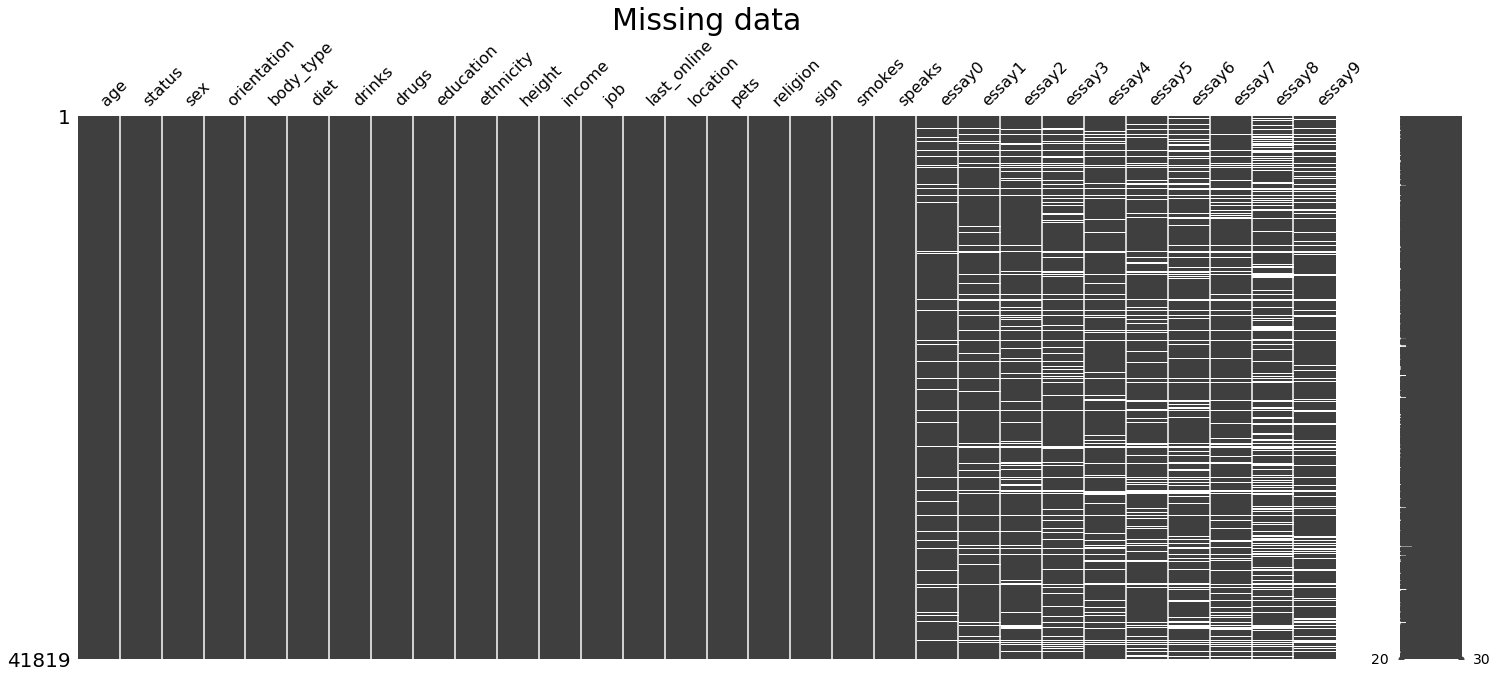

In [52]:
missing = msno.matrix(data)

missing.set_title('Missing data', fontsize = 30)

Fixing each column 

#### Column - 'Age'

In [53]:
data.age.max()

69

In [54]:
data.age.sort_values(ascending=False)

28700    69
2838     69
36778    69
13565    69
27882    69
         ..
37944    18
36009    18
10046    18
5154     18
41978    18
Name: age, Length: 41819, dtype: int64

No problem in the column

#### Column - 'Status'

In [55]:
data.status.value_counts()

single            39041
seeing someone     1328
available          1248
married             198
unknown               4
Name: status, dtype: int64

We will put the values of 'available' into 'single', since they mean the same thing

In [56]:
data.status = data.status.replace(['available'],['single'])

In [57]:
data.status.value_counts()

single            40289
seeing someone     1328
married             198
unknown               4
Name: status, dtype: int64

#### Column - 'Sex'

In [58]:
data.sex.value_counts()

m    25168
f    16651
Name: sex, dtype: int64

There is no such fixing required in this column

#### Column - 'Orientation'

In [59]:
data.orientation.value_counts()

straight    36130
gay          3894
bisexual     1795
Name: orientation, dtype: int64

There is no such fixing required in this column

#### Column - 'Body_type'

In [60]:
data.body_type.value_counts()

average           11253
fit                9751
athletic           8918
thin               3605
curvy              3027
a little extra     2102
skinny             1310
full figured        829
overweight          360
jacked              290
used up             236
rather not say      138
Name: body_type, dtype: int64

In [61]:
data['body_type'] = data.body_type.replace(['athletic','jacked','skinny,','a little extra','full figured','used up'],['fit','fit','thin','curvy','fit','overweight'])

In [62]:
data.body_type.value_counts()

fit               19788
average           11253
curvy              5129
thin               3605
skinny             1310
overweight          596
rather not say      138
Name: body_type, dtype: int64

We have replaced the unique values wherever required

#### Column - 'Diet'

In [63]:
data.diet.value_counts()

other                  14535
mostly anything        13532
anything                4488
strictly anything       3876
mostly vegetarian       2602
mostly other             790
strictly vegetarian      633
vegetarian               417
strictly other           331
mostly vegan             235
strictly vegan           152
vegan                     91
mostly kosher             67
mostly halal              32
strictly kosher           14
strictly halal            14
halal                      5
kosher                     5
Name: diet, dtype: int64

In [64]:
data['diet'] = data.diet.replace(['mostly anything','strictly anything','mostly vegetarian','mostly other','strictly vegetarian','strictly other','mostly vegan','strictly vegan','mostly kosher','mostly halal','strictly halal','strictly kosher','kosher','halal','anything','other'],['anything','anything','vegetarian','other','vegetarian','other','vegan','vegan','non vegetarian','non vegetarian','non vegetarian','non vegetarian','non vegetarian','non vegetarian','non vegetarian','preffer not to say'])

In [65]:
data.diet.value_counts()

anything              17408
preffer not to say    14535
non vegetarian         4625
vegetarian             3652
other                  1121
vegan                   478
Name: diet, dtype: int64

We have replaced the unique values wherever required

#### Column - 'Drinks

In [66]:
data.drinks.value_counts()

socially       30628
rarely          4560
often           3641
not at all      2457
very often       324
desperately      209
Name: drinks, dtype: int64

In [67]:
data['drinks'] = data.drinks.replace(['rarely','not at all','very often','often','desperately'],['socially','never','regularly','regularly','addicted'])

In [68]:
data.drinks.value_counts()

socially     35188
regularly     3965
never         2457
addicted       209
Name: drinks, dtype: int64

We have replaced the unique values wherever required

#### Column - 'Drugs'

In [69]:
data.drugs.value_counts()

never        27686
None          8197
sometimes     5639
often          297
Name: drugs, dtype: int64

In [70]:
data['drugs'] = data.drugs.replace(['None'],['Preffer not to say'])

In [71]:
data.drugs.value_counts()

never                 27686
Preffer not to say     8197
sometimes              5639
often                   297
Name: drugs, dtype: int64

We have replaced the unique values wherever required

#### Column - 'Education'

In [72]:
data.education.value_counts()

graduated from college/university    18519
graduated from masters program        7189
working on college/university         4533
graduated from two-year college       1311
working on masters program            1275
graduated from high school            1225
graduated from ph.d program           1034
working on two-year college            890
graduated from law school              888
dropped out of college/university      815
working on ph.d program                727
college/university                     535
graduated from space camp              517
dropped out of space camp              390
graduated from med school              361
working on space camp                  342
working on law school                  189
working on med school                  163
two-year college                       162
dropped out of two-year college        157
dropped out of masters program         107
dropped out of ph.d program             95
dropped out of high school              86
working on 

In [73]:
data['education'] = data.education.replace(['graduated from college/university','graduated from two-year college','graduated from law school','college/university','graduated from space camp','graduated from med school','space camp','law school ','med school ','two-year college','law school','med school'],['graduated','graduated','graduated','graduated','graduated','graduated','graduated','graduated','graduated','graduated','graduated','graduated'])

In [74]:
data['education'] = data.education.replace(['graduated from masters program','graduated from ph.d program','masters program','ph.d program'],['masters','masters','masters','masters'])

In [75]:
data['education'] = data.education.replace(['working on college/university','working on masters program','working on two-year college','working on ph.d program','working on space camp','working on law school','working on med school','working on high school'],['working','working','working','working','working','working','working','working'])

In [76]:
data['education'] = data.education.replace(['graduated from high school'],['high school'])

In [77]:
data['education'] = data.education.replace(['dropped out of college/university','dropped out of space camp','dropped out of two-year college','dropped out of masters program','dropped out of ph.d program','dropped out of high school','dropped out of law school','dropped out of med school'],['dropped out','dropped out','dropped out','dropped out','dropped out','dropped out','dropped out','dropped out'])

In [78]:
data.education.value_counts()

graduated      22354
masters         8309
working         8192
dropped out     1667
high school     1297
Name: education, dtype: int64

#### Column - 'Ethnicity'

Dropping the ethnicity column

In [79]:
data.drop(['ethnicity'], axis = 1, inplace = True)

In [80]:
data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'height', 'income', 'job', 'last_online',
       'location', 'pets', 'religion', 'sign', 'smokes', 'speaks', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9'],
      dtype='object')

The column is successfully dropped

#### Column - 'Essay' 

Dropping all the 'essay' column

In [81]:
data.drop(['essay0'], axis = 1, inplace = True)

In [82]:
data.drop(['essay1'], axis = 1, inplace = True)

In [83]:
data.drop(['essay2'], axis = 1, inplace = True)

In [84]:
data.drop(['essay3'], axis = 1, inplace = True)

In [85]:
data.drop(['essay4'], axis = 1, inplace = True)

In [86]:
data.drop(['essay5'], axis = 1, inplace = True)

In [87]:
data.drop(['essay6'], axis = 1, inplace = True)

In [88]:
data.drop(['essay7'], axis = 1, inplace = True)

In [89]:
data.drop(['essay8'], axis = 1, inplace = True)

In [90]:
data.drop(['essay9'], axis = 1, inplace = True)

Checking if the columns have been dropped

In [91]:
data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'height', 'income', 'job', 'last_online',
       'location', 'pets', 'religion', 'sign', 'smokes', 'speaks'],
      dtype='object')

The columns have been successfully dropped

#### Columns - 'Height'

In [92]:
data.height.max()

95.0

In [93]:
data.height.value_counts()

70.0    4302
68.0    3805
67.0    3736
72.0    3695
69.0    3614
66.0    3397
71.0    3382
64.0    2679
65.0    2647
73.0    1996
63.0    1872
74.0    1798
62.0    1548
75.0     968
61.0     703
76.0     565
60.0     502
77.0     190
59.0     153
78.0      90
79.0      38
58.0      35
80.0      20
57.0      11
95.0      10
82.0       9
83.0       8
81.0       7
56.0       6
55.0       5
53.0       4
36.0       3
94.0       3
91.0       2
54.0       2
43.0       2
85.0       1
48.0       1
86.0       1
93.0       1
47.0       1
49.0       1
9.0        1
92.0       1
87.0       1
37.0       1
88.0       1
3.0        1
Name: height, dtype: int64

The data for the 'Height' column shows annomaly, hence we will drop it

In [94]:
data.drop(['height'], axis =1, inplace=True)

Checking if the column has been dropped

In [95]:
data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'income', 'job', 'last_online', 'location',
       'pets', 'religion', 'sign', 'smokes', 'speaks'],
      dtype='object')

The column has been dropped successfully

#### Column - 'Income'

In [96]:
data.income.max()

1000000

In [97]:
data.income.min()

-1

In [98]:
data.income.value_counts()

-1          32575
 20000       2407
 100000      1311
 80000        887
 30000        837
 40000        805
 50000        787
 60000        583
 70000        561
 150000       534
 1000000      378
 250000       118
 500000        36
Name: income, dtype: int64

The value '-1' does not make sense in the 'Income' column, hence we will try are replace it

In [99]:
# Calculate the mean income excluding -1 values
mean_income = data[data['income'] != -1]['income'].mean()

In [100]:
mean_income

100249.8918217222

In [101]:
data['income'] = data['income'].replace(-1, round(mean_income,0))

In [102]:
data.income.value_counts()

100250     32575
20000       2407
100000      1311
80000        887
30000        837
40000        805
50000        787
60000        583
70000        561
150000       534
1000000      378
250000       118
500000        36
Name: income, dtype: int64

In [103]:
data.income.value_counts()

100250     32575
20000       2407
100000      1311
80000        887
30000        837
40000        805
50000        787
60000        583
70000        561
150000       534
1000000      378
250000       118
500000        36
Name: income, dtype: int64

The data has been successfully replaced

#### Column - 'Job'

In [104]:
data.job.value_counts()

other                                5523
student                              3760
science / tech / engineering         3686
computer / hardware / software       3575
rather not say                       3391
sales / marketing / biz dev          3343
artistic / musical / writer          3189
medicine / health                    2793
education / academia                 2650
executive / management               1852
banking / financial / real estate    1725
entertainment / media                1630
law / legal services                 1047
hospitality / travel                  969
construction / craftsmanship          707
clerical / administrative             593
political / government                552
transportation                        263
unemployed                            217
retired                               196
military                              158
Name: job, dtype: int64

Replacing the values to a larger domain to make the data simple to understand

In [105]:
data['job'] = data.job.replace(['science / tech / engineering','computer / hardware / software','sales / marketing / biz dev','artistic / musical / writer','medicine / health','education / academia','executive / management','banking / financial / real estate','entertainment / media','law / legal services','hospitality / travel','construction / craftsmanship','clerical / administrative','political / government','other'],['engineer','IT','sales','artist','health care','education','management','finance','entertainment','law','management','craftsmanship','corporate','politics','rather not say'])

In [106]:
data.job.value_counts()

rather not say    8914
student           3760
engineer          3686
IT                3575
sales             3343
artist            3189
management        2821
health care       2793
education         2650
finance           1725
entertainment     1630
law               1047
craftsmanship      707
corporate          593
politics           552
transportation     263
unemployed         217
retired            196
military           158
Name: job, dtype: int64

#### Column - 'Last Online'

In [107]:
data.last_online.value_counts()

2012-06-30-11-14    20
2012-06-30-22-09    18
2012-06-30-23-27    18
2012-06-30-10-15    18
2012-06-29-22-21    18
                    ..
2012-06-08-18-02     1
2012-01-30-22-18     1
2012-06-26-15-13     1
2012-06-24-13-13     1
2012-03-21-23-19     1
Name: last_online, Length: 22290, dtype: int64

Converting the 'last_online' data into date time format 

In [108]:
 data['last_online'] = pd.to_datetime(data['last_online'], format='%Y-%m-%d-%H-%M')

The data has been successfully converted

Fetching just the date from the date and time format

In [109]:
import datetime as dt

In [110]:
data['last_online'] = data['last_online'].dt.date

In [111]:
data.last_online.describe()

count          41819
unique           371
top       2012-06-30
freq            9944
Name: last_online, dtype: object

The date has been successfully fetched

Making a column 'Activity status' to track the activity status

In [112]:
data.last_online.max()

datetime.date(2012, 7, 1)

In [113]:
latest_date = pd.to_datetime('2012-07-01')

In [114]:
data['activity_status'] = latest_date - pd.to_datetime(data['last_online'])

In [115]:
data.activity_status.describe()

count                      41819
mean     37 days 11:11:23.775317
std      74 days 15:22:07.410663
min              0 days 00:00:00
25%              1 days 00:00:00
50%              4 days 00:00:00
75%             27 days 00:00:00
max            370 days 00:00:00
Name: activity_status, dtype: object

In [116]:
data.activity_status.max()

Timedelta('370 days 00:00:00')

In [117]:
data.activity_status.min()

Timedelta('0 days 00:00:00')

This column 'Activity status' lets us know when the person used the application last<br> 
The longest a person has not used the application is 370 days and the least the person has not used the application is 0 days

Dropping the 'last_online' column

In [118]:
data.drop(['last_online'], axis= 1, inplace=True)

Checking if the column has been dropped

In [119]:
data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'income', 'job', 'location', 'pets', 'religion',
       'sign', 'smokes', 'speaks', 'activity_status'],
      dtype='object')

In [120]:
data.activity_status.value_counts()

1 days      9944
2 days      6054
3 days      2851
4 days      1929
5 days      1494
            ... 
324 days       7
355 days       7
369 days       7
297 days       6
350 days       6
Name: activity_status, Length: 371, dtype: int64

The column has been successfully dropped

##### Visualizing the data

In [122]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,
    "figure.autolayout":True})

palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 720x720 with 0 Axes>

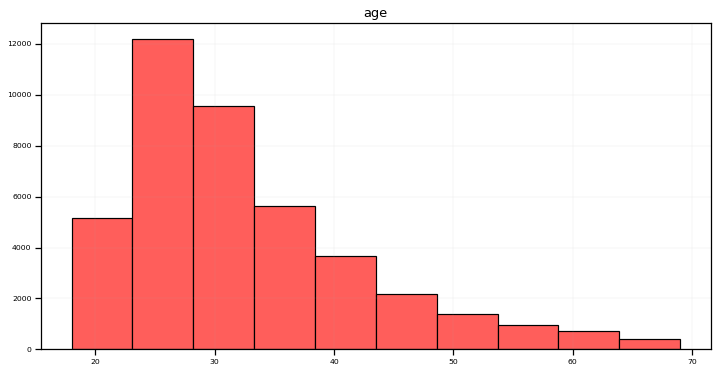

In [123]:
plt.figure(figsize=(10,10))

cols_to_plot = ['age']
data[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

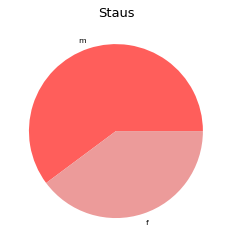

In [124]:
data['sex'].value_counts().plot(kind='pie');
plt.ylabel('')
plt.title('Staus')
plt.show()

Converting the data into an excel file to load it into the Power BI interface

In [125]:
data

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,income,job,location,pets,religion,sign,smokes,speaks,activity_status
0,22,single,m,straight,curvy,anything,socially,never,working,100250,transportation,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,3 days
1,35,single,m,straight,average,other,regularly,sometimes,working,80000,management,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",2 days
3,23,single,m,straight,thin,vegetarian,socially,Preffer not to say,working,20000,student,"berkeley, california",likes cats,other,pisces,no,"english, german (poorly)",3 days
4,29,single,m,straight,fit,preffer not to say,socially,never,graduated,100250,artist,"san francisco, california",likes dogs and likes cats,other,aquarius,no,english,4 days
5,29,single,m,straight,average,anything,socially,Preffer not to say,graduated,100250,IT,"san francisco, california",likes cats,atheism,taurus,no,"english (fluently), chinese (okay)",2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,32,single,m,bisexual,thin,non vegetarian,socially,Preffer not to say,working,100250,education,"san francisco, california",No preference,judaism and laughing about it,No Do not believe,no,"english, spanish (fluently)",135 days
59942,24,single,m,straight,fit,anything,regularly,sometimes,working,100250,entertainment,"san francisco, california",likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently),2 days
59943,42,single,m,straight,average,anything,never,never,masters,100000,craftsmanship,"south san francisco, california",No preference,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently),4 days
59944,27,single,m,straight,fit,anything,socially,often,working,100250,health care,"san francisco, california",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",8 days


In [126]:
# data_new = 'okcupid_profiles.xlsx'

In [127]:
# data_new

'okcupid_profiles.xlsx'

In [129]:
# data.to_excel('okcupid_profiles.xlsx', index=False)